# Loan Approval: Financial Risk Analysis

#### Kaggle Dataset: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval

In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv('Loan.csv')

loan_data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
loan_data.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


## Data Cleaning

In [4]:
# check datatypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [6]:
# check for nulls
loan_data.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [7]:
# check for duplicates
loan_data.duplicated().sum()

0

In [8]:
# convert ApplicationDate column to datetype
loan_data.ApplicationDate = pd.to_datetime(loan_data.ApplicationDate)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

In [11]:
# columns of interest

# Define the columns you want to keep
columns_ = ['ApplicationDate', 'AnnualIncome', 'CreditScore',
                   'EmploymentStatus', 'LoanAmount', 'SavingsAccountBalance',
                   'TotalAssets', 'TotalLiabilities', 'JobTenure', 'HomeOwnershipStatus', 'LoanApproved']

# Create a new DataFrame with only the specified columns
loan = loan_data[columns_]

In [12]:
loan.head()

,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1


In [13]:
loan.shape

(20000, 11)

## Data Exploration and Visualization

In [14]:
loan.columns

Index(['ApplicationDate', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'LoanAmount', 'SavingsAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'JobTenure', 'HomeOwnershipStatus', 'LoanApproved'],
      dtype='object')

In [15]:
# extract year and month from ApplicationDate
loan['Year'] = loan['ApplicationDate'].dt.year
loan['Month'] = loan['ApplicationDate'].dt.to_period('M')

C:\conda_tmp\ipykernel_19784\1405949820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Year'] = loan['ApplicationDate'].dt.year
C:\conda_tmp\ipykernel_19784\1405949820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Month'] = loan['ApplicationDate'].dt.to_period('M')


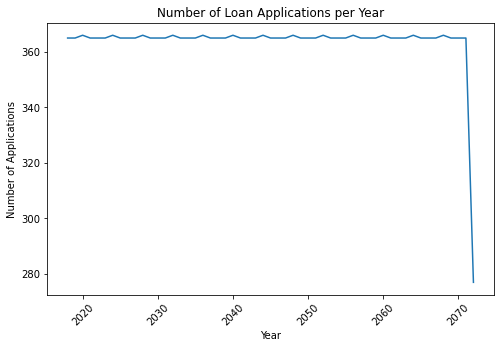

In [16]:
# group by year and count application
applications_per_year = loan.groupby('Year').size()

# visualization
plt.figure(figsize=(8,5))
sns.lineplot(x=applications_per_year.index, y=applications_per_year.values)
plt.title('Number of Loan Applications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()

In [19]:
# measure of central tendency
mean_ai = round(loan['AnnualIncome'].mean(),2)
median_ai = round(loan['AnnualIncome'].median(),2)
mode_ai = round(loan['AnnualIncome'].mode(),2)
percentile_25_ai = round(loan['AnnualIncome'].quantile(0.25),2)
percentile_75_ai = round(loan['AnnualIncome'].quantile(0.75),2)

#results
print('Mean = '+str(mean_ai))
print('Median = '+str(median_ai))
print('Mode = '+str(mode_ai))
print('percentile_25 = '+str(percentile_25_ai))
print('percentile_75 = '+str(percentile_75_ai))

Mean = 59161.47
Median = 48566.0
Mode = 0    15000
Name: AnnualIncome, dtype: int64
percentile_25 = 31679.0
percentile_75 = 74391.0


In [20]:
# income level for the majority of loan approved clients

def result(AnnualIncome):
    if AnnualIncome <= percentile_25_ai:
        return f'<= {percentile_25_ai}'
    elif AnnualIncome <= mean_ai:
        return f'<= {mean_ai}'
    elif AnnualIncome <= percentile_75_ai:
        return f'<= {percentile_75_ai}'
    else:
        return f'> {percentile_75_ai}'

# apply fn to dataset
loan['Income Category'] = loan['AnnualIncome'].apply(result)
loan.head()

C:\conda_tmp\ipykernel_19784\653473722.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Income Category'] = loan['AnnualIncome'].apply(result)


,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved,Year,Month,Income Category
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0,2018,2018-01,<= 59161.47
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0,2018,2018-01,<= 59161.47
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0,2018,2018-01,<= 59161.47
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0,2018,2018-01,<= 74391.0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1,2018,2018-01,> 74391.0


In [22]:
loan['Income Category'].unique()

array(['<= 59161.47', '<= 74391.0', '> 74391.0', '<= 31679.0'],
      dtype=object)

In [23]:
# grouping income category
applicants_by_category = loan.groupby('Income Category').size().sort_values(ascending=False)
applicants_by_category

Income Category
<= 59161.47    7522
<= 31679.0     5000
> 74391.0      5000
<= 74391.0     2478
dtype: int64

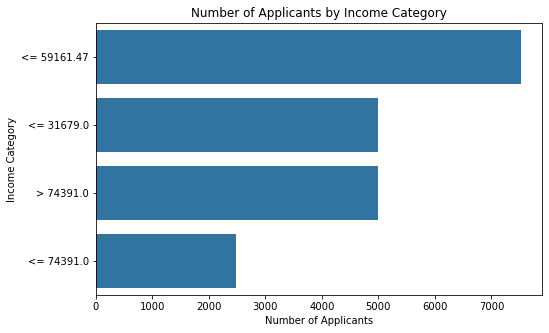

In [25]:
# visualization
plt.figure(figsize=(8, 5))
base_color = sns.color_palette()[0]

sns.barplot(x=applicants_by_category.values, y=applicants_by_category.index, color=base_color)

plt.xlabel('Number of Applicants')
plt.ylabel('Income Category')
plt.title('Number of Applicants by Income Category')

plt.show()

In [26]:
# filter loans where loan approved is 1
loans_approved = loan[loan['LoanApproved'] == 1]

approved_applicants_by_category = loans_approved.groupby('Income Category').size().sort_values(ascending=False)
print(approved_applicants_by_category)

Income Category
> 74391.0      3223
<= 59161.47     771
<= 74391.0      734
<= 31679.0       52
dtype: int64


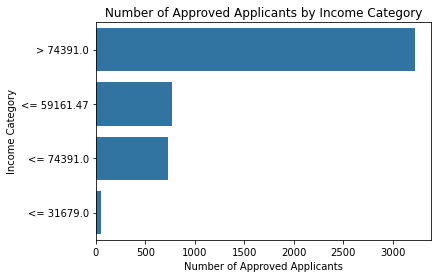

In [28]:
# visualization
sns.barplot(x=approved_applicants_by_category.values, y=approved_applicants_by_category.index, color=base_color)

plt.xlabel('Number of Approved Applicants')
plt.ylabel('Income Category')
plt.title('Number of Approved Applicants by Income Category')

plt.show()